In [1]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.68-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)


In [ ]:
# check if ellipsoid grains are stucked together, if so make its size smaller

In [54]:
import cv2
from pathlib import Path
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = {"Name": [], "Masked": [], "Real": [], "Diff": []}
 
paths = [("../../cropped_images/512/british_ellipse_masks", '*_spmke.jpg'), 
         ("../../cropped_images/512/raw_ellipse_masks", '*.jpg')]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/1445 [00:00<?, ?it/s]

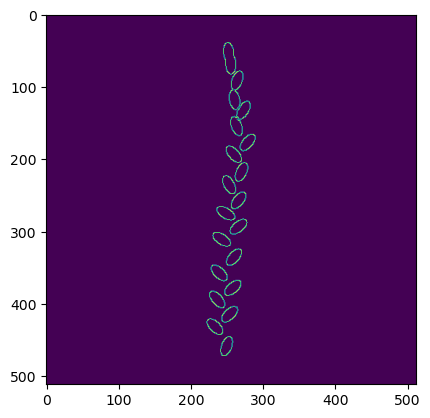

In [66]:
for path in paths:
    for file in tqdm([*(Path(path[0])).glob(path[1])]):
        img = cv2.imread(str(file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        img = cv2.Canny(img, 100, 120)
        _, threshold = cv2.threshold(img, 1800, 2000, cv2.THRESH_BINARY_INV)
        contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        roi = pd.read_csv("../../data/all_rois/" + file.stem[:-6] + ".roi2")

        new = cv2.drawContours(img, contours, -1, (255,0,0), 1)

        data["Name"].append(file.stem[:-6])
        data["Masked"].append(len(contours))
        data["Real"].append(len(roi) + 1)
        data["Diff"].append((len(roi) + 1) - (len(contours)))
    
plt.imshow(new)
    
df = pd.DataFrame(data)
df.to_csv("ellipses.csv", index=False, sep=";")

In [67]:
df = pd.read_csv("ellipses.csv", sep=";")
df

,Name,Masked,Real,Diff
0,Spike_831,11,16,5
1,Spike_776,8,9,1
2,Spike_625,6,7,1
3,Spike_70,10,10,0
4,Spike_42,9,10,1
...,...,...,...,...
1696,7251_4,8,11,3
1697,IMG_0516,15,21,6
1698,IMG_9580,13,26,13
1699,IMG_1159,23,27,4


In [68]:
sorted_df = df.sort_values(by=["Diff"], ascending=False)

sorted_df.to_csv('sorted.csv', index=False)